(449, 1, 96, 96, 3)
(449, 96, 96, 3)
x_train shape: (314, 96, 96, 3)
x_test shape: (135, 96, 96, 3)
314 train samples
135 test samples
y_train shape: (314, 29)
y_test shape: (135, 29)
314 train samples
135 test samples
Model: "insect_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 6)         168       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 47, 47, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 12)        660       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 12)        0         
___________________________________

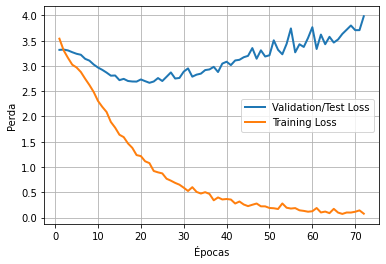

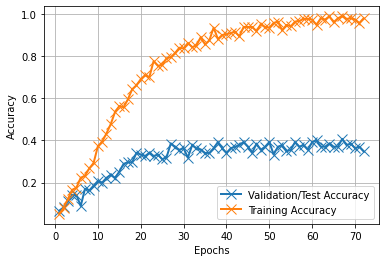

In [1]:
# Importar bibliotecas
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import load_model
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image
import pathlib
import pandas as pd
from keras.utils.vis_utils import plot_model

path = 'Insect_Corn_Dataset/'
X = np.load(os.path.join(path,'features_insectcorn.npy'))
print(X.shape)
X = np.reshape(X,(449,96,96,3))
print(X.shape)

Y = pd.read_csv("y_values_def.csv", usecols = ["class"])
Y = pd.DataFrame(Y)

from sklearn.model_selection import train_test_split # Importar função train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
y_train = keras.utils.np_utils.to_categorical(y_train, 29)
y_test = keras.utils.np_utils.to_categorical(y_test, 29)

# Change the image type to float32 data type
x_train = x_train.astype("float32")
x_test =  x_test.astype("float32")

# Normalize the data by changing the range from (0, 255) to (0, 1)
x_train /= 255
x_test /= 255

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print(y_train.shape[0], "train samples")
print(y_test.shape[0], "test samples")

input_shape = (96,96,3)

# Create model
model = Sequential(name = "insect_net")

# adding layers
model.add(Conv2D(6, activation = "relu",
         input_shape = input_shape,
         kernel_size = (3,3)))
model.add(MaxPooling2D(pool_size = (2,2),
          strides = 2))
model.add(Dropout(0.5))
model.add(Conv2D(12, activation = "relu",
         kernel_size = (3,3)))
model.add(MaxPooling2D(pool_size = (2,2),
          strides = 2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(29))
model.add(Activation('softmax'))
          
print(model.summary())
plot_model(model, dpi = 70,  show_shapes = True, expand_nested = True)

opt = tf.keras.optimizers.Adam(
    learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam',
)

model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ["accuracy"])

batch_size = 1
epochs = 100
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5)

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test),
                    callbacks = [callback])

score = model.evaluate(x_test, y_test, verbose = 0)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

# Plotting loss and accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs, val_loss_values, label = "Validation/Test Loss")
line2 = plt.plot(epochs, loss_values, label = "Training Loss")
plt.setp(line1, linewidth = 2.0)
plt.setp(line2, linewidth = 2.0)
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.grid(True)
plt.legend()
plt.savefig("Categorical_CrossEntropy.png", transparent = False, bbox_inches = "tight")
plt.show()

acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs, val_acc_values, label = "Validation/Test Accuracy")
line2 = plt.plot(epochs, acc_values, label = "Training Accuracy")
plt.setp(line1,  linewidth = 2.0, marker = "x", markersize = 10.0)
plt.setp(line2,  linewidth = 2.0, marker = "x", markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       1.00      0.40      0.57         5
           5       0.17      0.25      0.20         4
           6       0.40      0.33      0.36         6
           7       0.36      0.62      0.45         8
           8       0.50      1.00      0.67         1
           9       1.00      0.57      0.73         7
          10       0.17      0.50      0.26         8
          11       0.50      0.50      0.50         2
          12       0.67      0.67      0.67         3
          13       1.00      0.67      0.80         6
          14       0.00      0.00      0.00         4
          15       0.50      0.25      0.33         4
          16       0.67      0.50      0.57         4
          17       0.22    

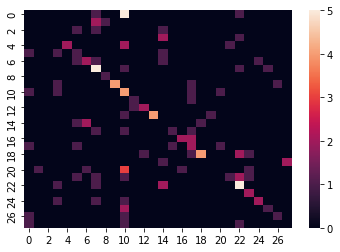

In [2]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)

print(classification_report(np.argmax(y_test, axis = 1), y_pred, zero_division = 0))
cf_matrix = confusion_matrix(np.argmax(y_test, axis = 1), y_pred)
print(confusion_matrix(np.argmax(y_test, axis = 1), y_pred))
A = sns.heatmap(cf_matrix, annot=False)
plt.savefig("crossentro_heat.png")